In [3]:
import sys
sys.path.append("..")

In [4]:
import numpy as np
np.seterr(divide="ignore")
import logging
import pickle
import glob

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.utils import check_random_state

from scipy import interp

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 6)

In [5]:
def evaluate_models(pattern):
    rocs = []
    fprs = []
    tprs = []
    
    for filename in glob.glob(pattern):            
        data = pickle.load(open(filename, "rb"))
        y = data[:, 0]
        y_pred = data[:, 1]
        
        # Roc
        rocs.append(roc_auc_score(y, y_pred))
        fpr, tpr, _ = roc_curve(y, y_pred)
        
        fprs.append(fpr)
        tprs.append(tpr)
        
    return rocs, fprs, tprs

def plot_rocs(rocs, fprs, tprs, label="", color="r", show_all=False):
    inv_fprs = []
    base_tpr = np.linspace(0.05, 1, 476)
    
    for fpr, tpr in zip(fprs, tprs):
        inv_fpr = interp(base_tpr, tpr, 1. / fpr)
        inv_fprs.append(inv_fpr)
        if show_all:
            plt.plot(base_tpr, inv_fpr, alpha=0.1, color=color)
        
    inv_fprs = np.array(inv_fprs)
    mean_inv_fprs = inv_fprs.mean(axis=0)


    plt.plot(base_tpr, mean_inv_fprs, color, 
             label="%s" % label)
    
def plot_show(filename=None):
    plt.xlabel("Signal efficiency")
    plt.ylabel("1 / Background efficiency")
    plt.xlim([0.1, 1.0])
    plt.yscale("log")
    plt.legend(loc="best")
    plt.grid()
    
    if filename:
        plt.savefig(filename)
    
    plt.show()
    
def report_score(rocs, fprs, tprs, label, latex=False):       
    inv_fprs = []
    base_tpr = np.linspace(0.05, 1, 476)
    
    for fpr, tpr in zip(fprs, tprs):
        inv_fpr = interp(base_tpr, tpr, 1. / fpr)
        inv_fprs.append(inv_fpr)
        
    inv_fprs = np.array(inv_fprs)
    mean_inv_fprs = inv_fprs.mean(axis=0)
    
    if not latex:
        print("%32s\tROC AUC=%.4f+-%.2f\t1/FPR@TPR=0.5=%.2f+-%.2f" %  (label, 
                                                                       np.mean(rocs), 
                                                                       np.std(rocs),
                                                                       np.mean(inv_fprs[:, 225]),
                                                                       np.std(inv_fprs[:, 225])))
    else:
        print("%30s \t& %.4f $\pm$ %.4f \t& %.1f $\pm$ %.1f \\\\" % 
              (label,
               np.mean(rocs), 
               np.std(rocs),
               np.mean(inv_fprs[:, 225]),
               np.std(inv_fprs[:, 225])))

                   1 $k_t$ jet 	& 0.9602 $\pm$ 0.0004 	& 196.6 $\pm$ 9.9 \\
             1 $k_t$ jet (rev) 	& 0.9602 $\pm$ 0.0004 	& 195.9 $\pm$ 8.0 \\
                  2 $k_t$ jets 	& 0.9866 $\pm$ 0.0006 	& 2784.1 $\pm$ 497.7 \\
            2 $k_t$ jets (rev) 	& 0.9866 $\pm$ 0.0007 	& 2521.5 $\pm$ 450.2 \\
                  5 $k_t$ jets 	& 0.9865 $\pm$ 0.0003 	& 1939.4 $\pm$ 421.8 \\
            5 $k_t$ jets (rev) 	& 0.9867 $\pm$ 0.0004 	& 2592.1 $\pm$ 433.3 \\


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


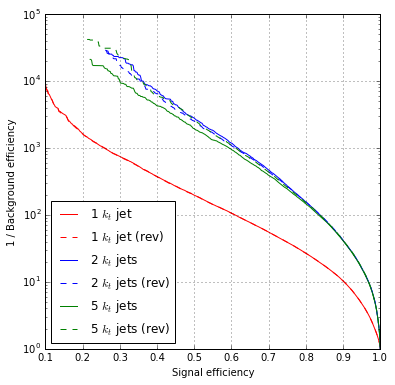

In [6]:
for pattern, n_jets, label, color in [
        ("antikt-kt", 1, "1 $k_t$ jet", "r"),
        ("antikt-kt", 2, "2 $k_t$ jets", "b"),
        ("antikt-kt", 5, "5 $k_t$ jets", "g")
    ]:
    
    r, f, t = evaluate_models("../models/event-study/predictions/predictions-e-full-%s-%d-*.pickle" % (pattern, n_jets))
    plot_rocs(r, f, t, label=label, color=color, show_all=False)
    report_score(r, f, t, label=label, latex=True)
    
    r, f, t = evaluate_models("../models/event-study/predictions-reversed/predictions-e-full-%s-%d-*.pickle" % (pattern, n_jets))
    plot_rocs(r, f, t, label=label + " (rev)", color=color + "--", show_all=False)
    report_score(r, f, t, label=label + " (rev)", latex=True)
    
plot_show()

              1 desc-$p_T$ jet 	& 0.9594 $\pm$ 0.0010 	& 181.3 $\pm$ 14.9 \\
        1 desc-$p_T$ jet (rev) 	& 0.9594 $\pm$ 0.0010 	& 181.3 $\pm$ 14.9 \\
             2 desc-$p_T$ jets 	& 0.9873 $\pm$ 0.0005 	& 2650.5 $\pm$ 448.8 \\
       2 desc-$p_T$ jets (rev) 	& 0.9875 $\pm$ 0.0006 	& 3170.9 $\pm$ 379.0 \\
             5 desc-$p_T$ jets 	& 0.9870 $\pm$ 0.0003 	& 2265.0 $\pm$ 249.7 \\
       5 desc-$p_T$ jets (rev) 	& 0.9872 $\pm$ 0.0003 	& 2539.8 $\pm$ 662.7 \\


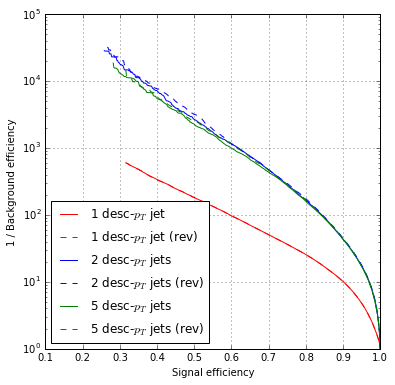

In [7]:
for pattern, n_jets, label, color in [
        ("antikt-seqpt-reversed", 1, "1 desc-$p_T$ jet", "r"),
        ("antikt-seqpt-reversed", 2, "2 desc-$p_T$ jets", "b"),
        ("antikt-seqpt-reversed", 5, "5 desc-$p_T$ jets", "g")
    ]:
    
    r, f, t = evaluate_models("../models/event-study/predictions/predictions-e-full-%s-%d-*.pickle" % (pattern, n_jets))
    plot_rocs(r, f, t, label=label, color=color, show_all=False)
    report_score(r, f, t, label=label, latex=True)
    
    r, f, t = evaluate_models("../models/event-study/predictions-reversed/predictions-e-full-%s-%d-*.pickle" % (pattern, n_jets))
    plot_rocs(r, f, t, label=label + " (rev)", color=color + "--", show_all=False)
    report_score(r, f, t, label=label + " (rev)", latex=True)
    
plot_show()

                       1 jet4v 	& 0.8909 $\pm$ 0.0007 	& 18.2 $\pm$ 0.2 \\
                 1 jet4v (rev) 	& 0.8909 $\pm$ 0.0007 	& 18.2 $\pm$ 0.2 \\
                       2 jet4v 	& 0.9551 $\pm$ 0.0026 	& 105.4 $\pm$ 8.9 \\
                 2 jet4v (rev) 	& 0.9606 $\pm$ 0.0011 	& 128.8 $\pm$ 8.5 \\
                       5 jet4v 	& 0.9574 $\pm$ 0.0013 	& 125.0 $\pm$ 6.9 \\
                 5 jet4v (rev) 	& 0.9576 $\pm$ 0.0019 	& 133.2 $\pm$ 7.6 \\


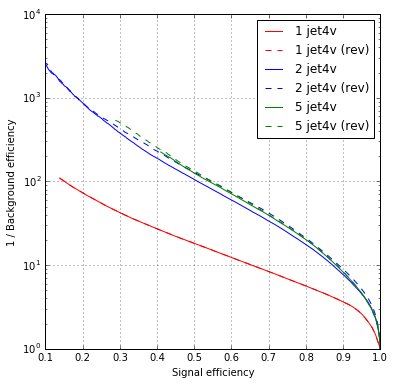

In [9]:
for pattern, n_jets, label, color in [
        ("jet4v", 1, "1 jet4v", "r"),
        ("jet4v", 2, "2 jet4v", "b"),
        ("jet4v", 5, "5 jet4v", "g")
    ]:
    
    r, f, t = evaluate_models("../models/event-study/predictions/predictions-e-4v-%s-%d-*.pickle" % (pattern, n_jets))
    plot_rocs(r, f, t, label=label, color=color, show_all=False)
    report_score(r, f, t, label=label, latex=True)
    
    r, f, t = evaluate_models("../models/event-study/predictions-reversed/predictions-e-4v-%s-%d-*.pickle" % (pattern, n_jets))
    plot_rocs(r, f, t, label=label + " (rev)", color=color + "--", show_all=False)
    report_score(r, f, t, label=label + " (rev)", latex=True)
    
plot_show()

                       1 all4v 	& 0.6501 $\pm$ 0.0023 	& 3.3 $\pm$ 0.0 \\
                 1 all4v (rev) 	& 0.6501 $\pm$ 0.0023 	& 3.3 $\pm$ 0.0 \\
                      50 all4v 	& 0.8986 $\pm$ 0.0023 	& 27.2 $\pm$ 0.9 \\
                50 all4v (rev) 	& 0.8925 $\pm$ 0.0079 	& 24.9 $\pm$ 2.1 \\
                     100 all4v 	& 0.8963 $\pm$ 0.0056 	& 28.5 $\pm$ 2.2 \\
               100 all4v (rev) 	& 0.8781 $\pm$ 0.0180 	& 23.4 $\pm$ 4.3 \\
                     200 all4v 	& 0.8857 $\pm$ 0.0048 	& 26.1 $\pm$ 1.5 \\
               200 all4v (rev) 	& 0.8846 $\pm$ 0.0091 	& 25.2 $\pm$ 2.9 \\
                     400 all4v 	& 0.8684 $\pm$ 0.0094 	& 20.4 $\pm$ 2.7 \\
               400 all4v (rev) 	& 0.8780 $\pm$ 0.0132 	& 23.0 $\pm$ 4.0 \\


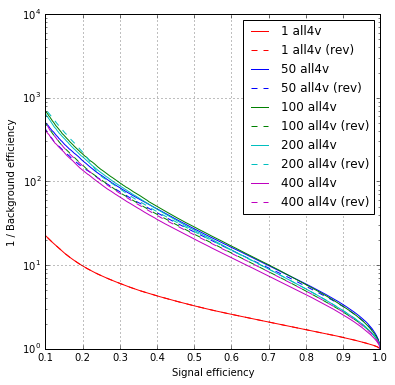

In [10]:
for pattern, n_jets, label, color in [
        ("all4v", 1, "1 all4v", "r"),
        ("all4v", 50, "50 all4v", "b"),
        ("all4v", 100, "100 all4v", "g"),
        ("all4v", 200, "200 all4v", "c"),
        ("all4v", 400, "400 all4v", "m")
    ]:
    
    r, f, t = evaluate_models("../models/event-study/predictions/predictions-e-4v-%s-%d-*.pickle" % (pattern, n_jets))
    plot_rocs(r, f, t, label=label, color=color, show_all=False)
    report_score(r, f, t, label=label, latex=True)
    
    r, f, t = evaluate_models("../models/event-study/predictions-reversed/predictions-e-4v-%s-%d-*.pickle" % (pattern, n_jets))
    plot_rocs(r, f, t, label=label + " (rev)", color=color + "--", show_all=False)
    report_score(r, f, t, label=label + " (rev)", latex=True)
    
plot_show()